<a href="https://colab.research.google.com/github/KudryashovDmitry/PDA_SOL/blob/main/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import seaborn
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Задание по МО/train.csv', index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 80)

In [ ]:
df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=289)

In [ ]:
df.isna().values.any()

True

In [ ]:
df.isna().sum()

MSSubClass                 0
LotFrontage              259
LotArea                    0
OverallQual                0
OverallCond                0
                        ... 
SaleCondition_AdjLand      0
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
SaleCondition_Partial      0
Length: 289, dtype: int64

In [ ]:
for i in df.columns:
    if df[i].dtype == object:
        df[i] = df[i].fillna('unknown')
    if df[i].dtype == float:
        print(i)
        df[i] = df[i].fillna(df[i].mean())

LotFrontage
MasVnrArea
GarageYrBlt


In [ ]:
df.isna().values.any()

False

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519414, 180921.19589041095, 0.9319665641512983))

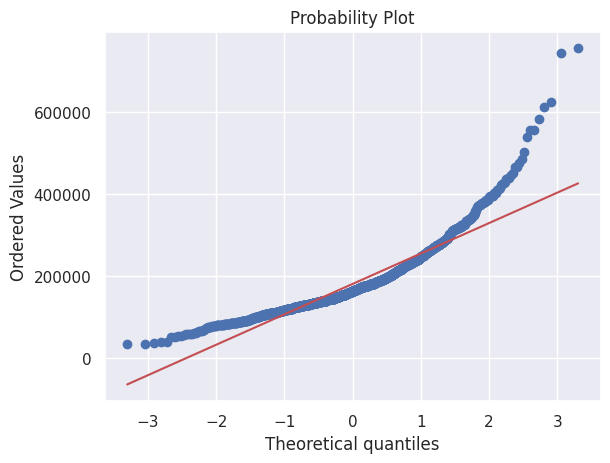

In [ ]:
scipy.stats.probplot(df.SalePrice,plot= plt)

Построим графики зависимостей следующих признаков:
дата постройки дома и его стоимости
качество дома и материалов и его стоимости
площадь дома и стоимость

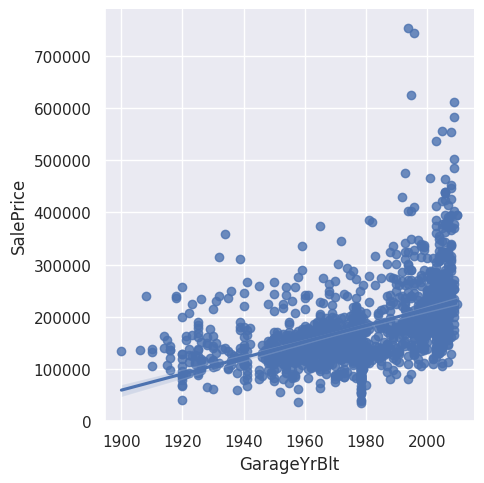

In [ ]:
sns.lmplot(x="GarageYrBlt", y="SalePrice", data=df)

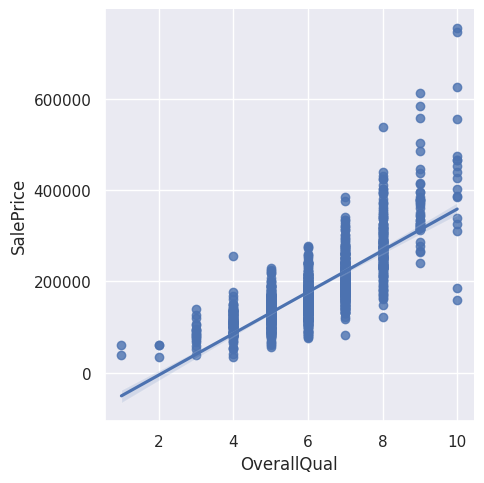

In [ ]:
sns.lmplot(x="OverallQual", y="SalePrice", data=df)

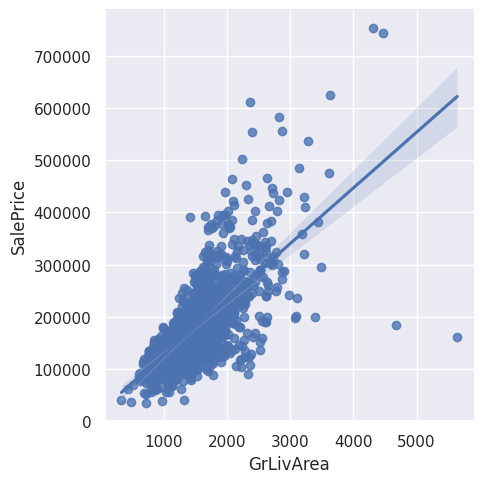

In [ ]:
sns.lmplot(x="GrLivArea", y="SalePrice", data=df)

На основе предыдущих графиков можно сделать вывод что существует некоторая линейная зависимость по некоторым признакам. Чтобы не строить 80 графиков на каждый признак, построим график корреляции всех признаков.

<ipython-input-68-e2e587c240be>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

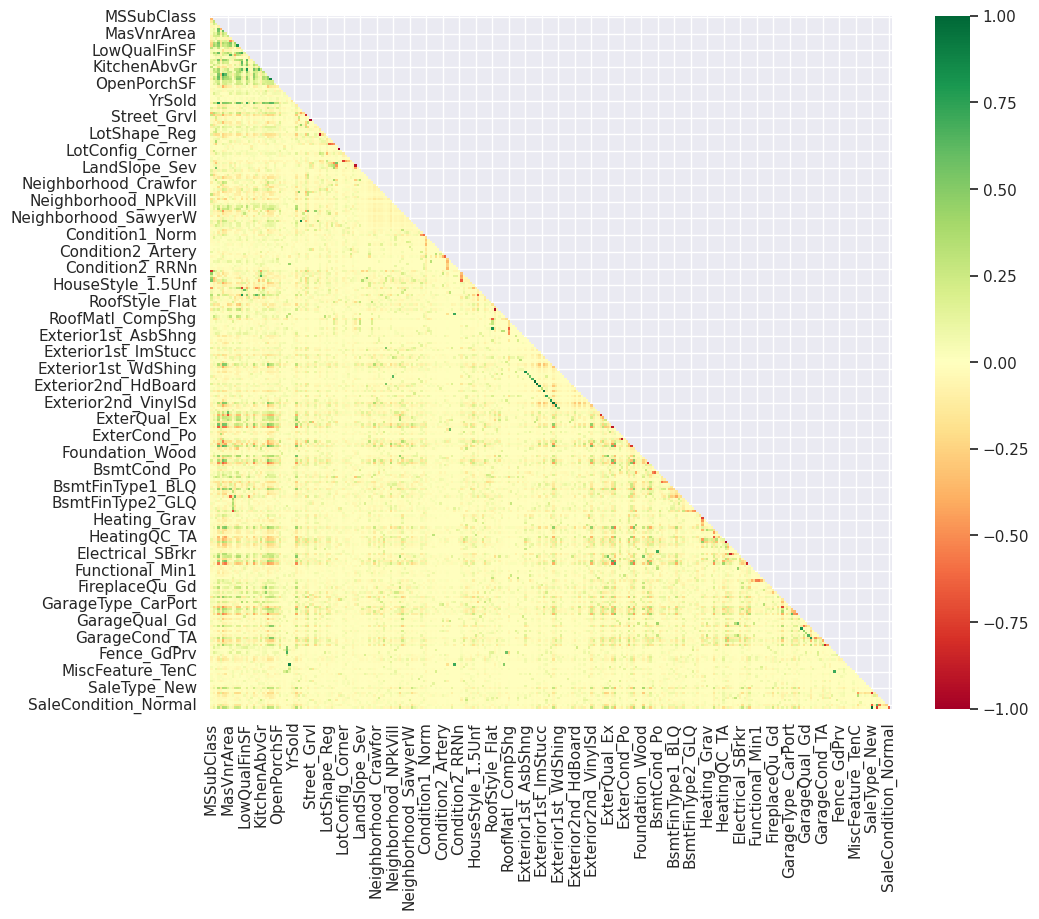

In [ ]:
plt.subplots(figsize=(11, 9))

corr = np.abs(df.corr())

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(),cmap="RdYlGn",mask = mask)

после построения получилась матрица 38х38, где наблюдаются сильно коррелируемые признаки с выбранной переменной.

Нарисуем крупно heatmap этих сильно коррелируемых признаков ( больше 0.5 по абсолютному значению), отобразив чтобы в каждой ячейке было значение корреляции.

<ipython-input-69-49c67d1bc3c9>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(a[(a['SalePrice']> 0.5) | (a['SalePrice'] < -0.5)].T[(a.T['SalePrice']> 0.5) | (a.T['SalePrice'] < -0.5)], dtype=np.bool)


<Axes: >

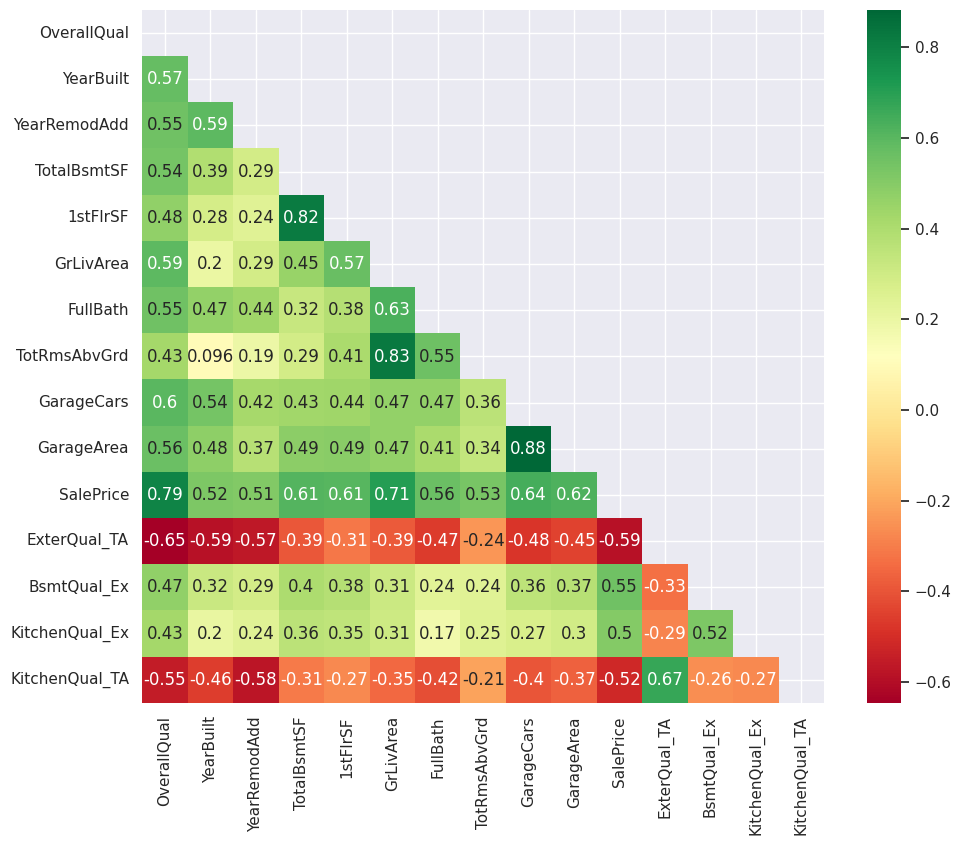

In [ ]:
a = df.corr()
plt.subplots(figsize=(11, 9))

mask = np.zeros_like(a[(a['SalePrice']> 0.5) | (a['SalePrice'] < -0.5)].T[(a.T['SalePrice']> 0.5) | (a.T['SalePrice'] < -0.5)], dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(a[(a['SalePrice']> 0.5) | (a['SalePrice'] < -0.5)].T[(a.T['SalePrice']> 0.5) | (a.T['SalePrice'] < -0.5)],cmap="RdYlGn",annot=True,mask = mask)

По сколько линейная регрессия не может обрабатывать категориальные признаки, необходимо перевести их в вектора числовых значений

In [ ]:
df = pd.get_dummies(df)
X = df.drop("SalePrice",1)
Y = df['SalePrice']

<ipython-input-70-8639d2badf35>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("SalePrice",1)


In [ ]:
lr = LinearRegression().fit(X,Y)

In [ ]:
for coef, col in sorted(zip(lr.coef_, df.columns), key=lambda x: np.abs(x[0])):
    print("{} \t {}".format(np.round(coef, 2), col))

0.02 	 MiscVal
0.71 	 LotArea
0.86 	 OpenPorchSF
-1.81 	 BsmtUnfSF
2.92 	 EnclosedPorch
3.56 	 MasVnrType_BrkCmn
8.77 	 BsmtFinSF2
15.12 	 WoodDeckSF
15.83 	 BsmtFinSF1
-17.67 	 GarageYrBlt
18.34 	 GarageArea
18.69 	 1stFlrSF
20.72 	 MasVnrArea
22.79 	 TotalBsmtSF
25.65 	 GrLivArea
-29.56 	 LowQualFinSF
33.1 	 3SsnPorch
35.82 	 ScreenPorch
36.52 	 2ndFlrSF
43.0 	 LotFrontage
52.67 	 BsmtFinType1_Rec
-56.24 	 MSSubClass
62.31 	 Neighborhood_Sawyer
-69.25 	 CentralAir_N
69.25 	 HeatingQC_TA
104.23 	 YearRemodAdd
-107.84 	 GarageType_unknown
144.96 	 Alley_Grvl
148.77 	 Functional_Maj1
153.56 	 BsmtFinType1_ALQ
319.61 	 YearBuilt
-390.17 	 BsmtHalfBath
395.63 	 Exterior1st_Wd Sdng
-459.01 	 LotShape_Reg
-459.46 	 MoSold
483.92 	 Neighborhood_SawyerW
487.72 	 GarageType_Basment
-563.49 	 YrSold
564.59 	 Exterior2nd_Wd Sdng
658.68 	 GarageType_2Types
660.08 	 Exterior2nd_Stone
664.04 	 Street_Pave
685.38 	 PoolArea
-716.89 	 GarageFinish_RFn
-741.62 	 FireplaceQu_Po
779.81 	 Exterior2nd_ImS

In [ ]:
cross_val_score(lr,X,Y,cv=5).mean()

0.7940460181721049

применим методы ругляризации линейных моделей Lasso и Ridge regression, что должно предотвратить переобучение модели.

 ось X - alpha, ось Y - значение коэффициента

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.715e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.316e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.148e+10, tolerance: 9.208e

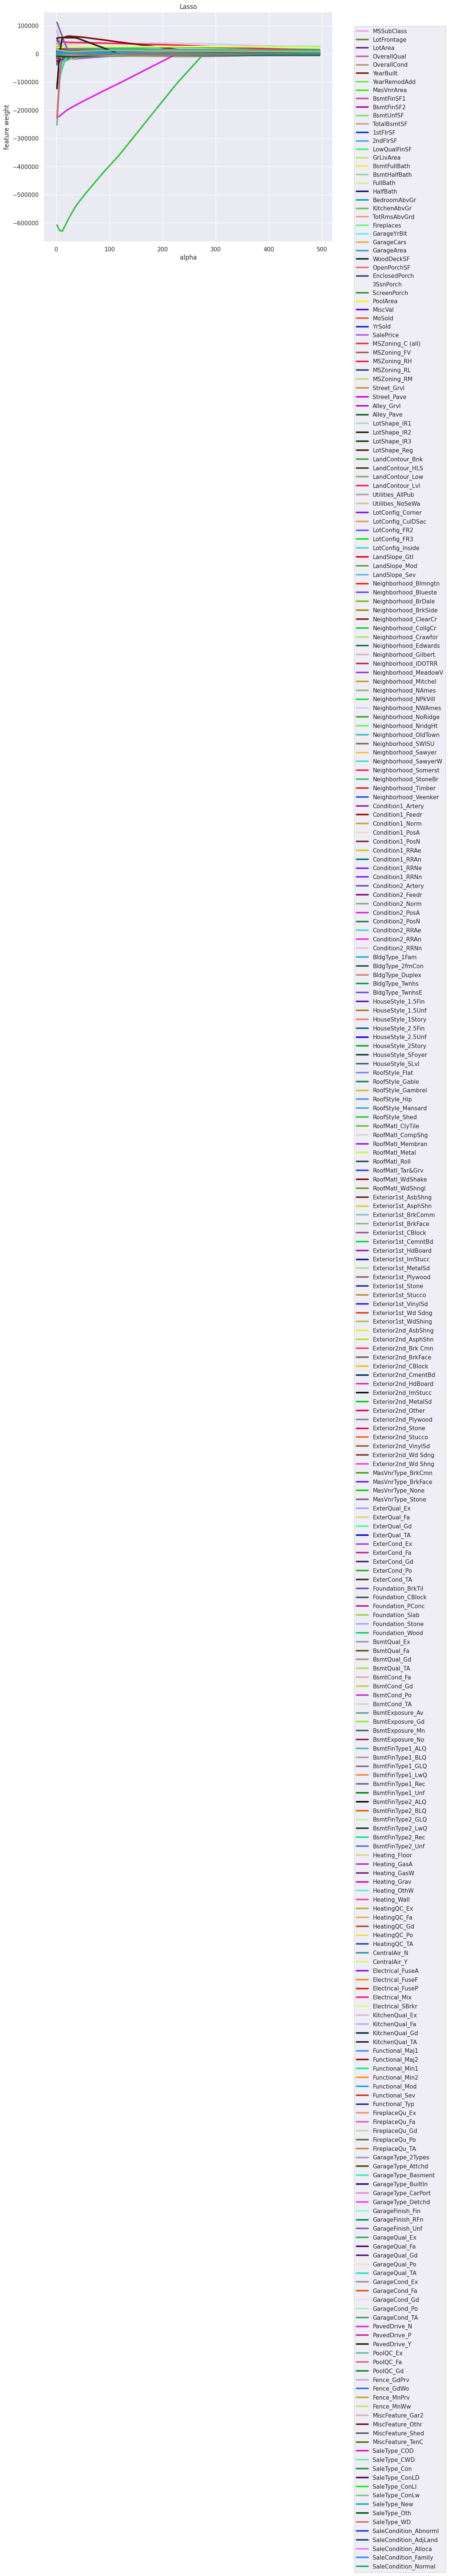

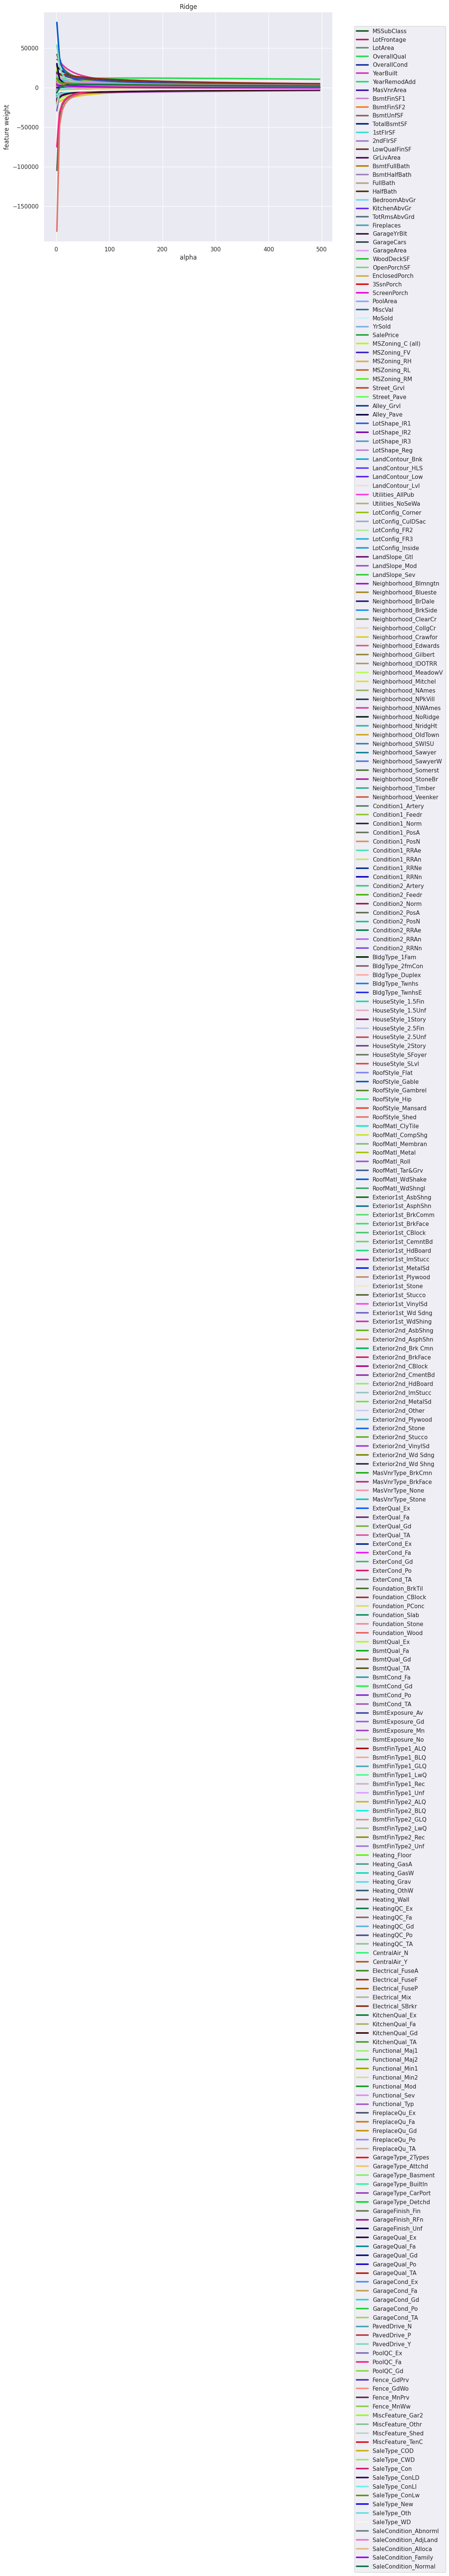

In [ ]:
alphas = np.arange(1, 500, 5)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1]))
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

for i, alpha in enumerate(alphas):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, Y)
    coefs_lasso[i, :] = lasso.coef_

    ridge = Ridge(alpha=alpha)
    ridge.fit(X, Y)
    coefs_ridge[i, :] = ridge.coef_

plt.figure(figsize=(10, 8))
for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3), linewidth=3)
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(10, 8))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3), linewidth=3)
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

Определим оптимальное значение альфа с разбивкой на 5 блоков

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1049139372.076416, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2888644632.0806885, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2966464021.477173, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWa

Optimal alpha: 50.000


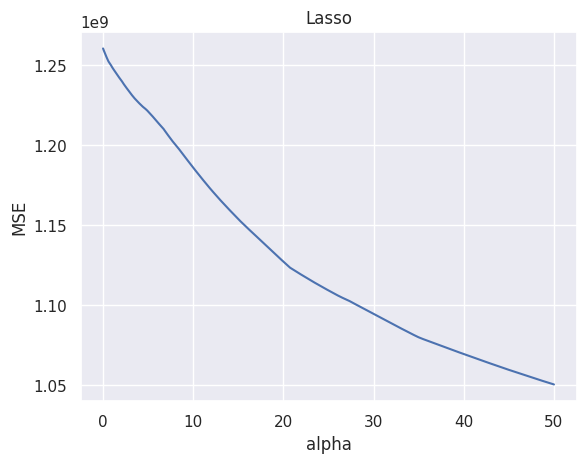

In [ ]:
from sklearn.linear_model import LassoCV

alphas = np.linspace(0.001, 50, 500)
lasso_cv = LassoCV(alphas=alphas, random_state=42, cv=5)
lasso_cv.fit(X, Y)

mean_mse = np.mean(lasso_cv.mse_path_, axis=1)
plt.plot(lasso_cv.alphas_, mean_mse)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Lasso')
plt.grid(True)
print(f'Optimal alpha: {lasso_cv.alpha_:.3f}')

In [ ]:
cross_val_score(lasso_cv,X,Y,cv=5).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5605828103.0894165, tolerance: 599433295.0230061
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10750671113.788849, tolerance: 599433295.0230061
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11185996353.353638, tolerance: 599433295.0230061
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: Convergence

0.8378438082176475

Получаем значение ~ 0.84

разобъём датасет на тренировочную и тестовую часть в соотношении 0,3

In [ ]:
X_train,X_test,Y_train,Y_test =  train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape,X_test.shape)

(1022, 288) (438, 288)


In [ ]:
alphas = np.linspace(0.001, 50, 500)
lasso_cv = LassoCV(alphas = [50], random_state=42,cv = 5)
lasso_cv.fit(X_train, Y_train)

LassoCV(alphas=[50], cv=5, random_state=42)

<Axes: ylabel='SalePrice'>

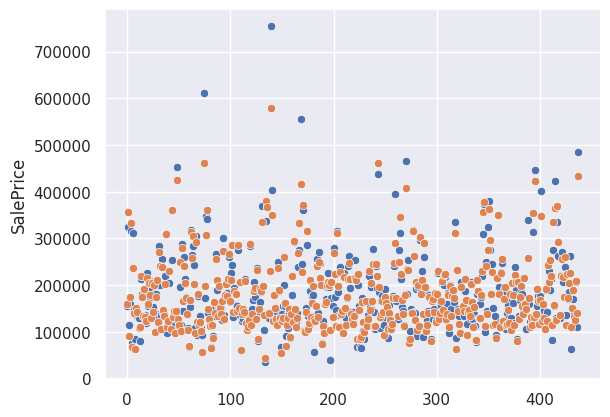

In [ ]:
sns.scatterplot(x=range(len(Y_test)), y=Y_test)
sns.scatterplot(x=range(len(Y_test)), y=lasso_cv.predict(X_test))

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Задание по МО/train.csv', index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
correlation_matrix = df.corr()
selected_columns = correlation_matrix.loc[:, (correlation_matrix['SalePrice'] > 0.5) | (correlation_matrix['SalePrice'] < -0.5)]
my_perfect_df = df[selected_columns.columns]
my_perfect_df

<ipython-input-83-502717f5b2f7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
Id,,,,,,,,,,,
1,7,2003,2003,856,856,1710,2,8,2,548,208500
2,6,1976,1976,1262,1262,1262,2,6,2,460,181500
3,7,2001,2002,920,920,1786,2,6,2,608,223500
4,7,1915,1970,756,961,1717,1,7,3,642,140000
5,8,2000,2000,1145,1145,2198,2,9,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1456,6,1999,2000,953,953,1647,2,7,2,460,175000
1457,6,1978,1988,1542,2073,2073,2,7,2,500,210000
1458,7,1941,2006,1152,1188,2340,2,9,1,252,266500


In [ ]:
X = my_perfect_df.drop("SalePrice",1)
Y = my_perfect_df['SalePrice']

<ipython-input-84-b285f3af788b>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = my_perfect_df.drop("SalePrice",1)


In [ ]:
lasso_cv1 = LassoCV(alphas=[1], random_state=42,cv = 5)
lasso_cv1.fit(X, Y)

LassoCV(alphas=[1], cv=5, random_state=42)

In [ ]:
cross_val_score(lasso_cv1,X,Y,cv=5).mean()

0.7596265023373696

В качестве вывода, для лучшей модели необходимо уделить большую часть врмени на подготовку и построение графиков и нахождение зависимостей, после чего составлять модели

